In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

%matplotlib inline

This is a template for your final project. 

In [2]:
full_dataset = pd.read_csv('imdb_movies.csv')
full_dataset.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


### Part 1.

Task formalization and Evaluation criteria

1.1 Select your target variable, explain your choice. Separate target variable from the feature matrix.

It would be reasonable to measure succes of a movie by considering its financial results through income or income/budget ratio. However these data colums contain a lot of NaN values and cannot be used as target variables (see below).

In [3]:
print(f'Proportion of NaN values for `worlwide_gross_income`: {int(full_dataset.worlwide_gross_income.isna().sum() / len(full_dataset.worlwide_gross_income) * 100)}%')
print(f'Proportion of NaN values for `usa_gross_income`: {int(full_dataset.usa_gross_income.isna().sum() / len(full_dataset.usa_gross_income) * 100)}%')
print(f'Proportion of NaN values for `budget`: {int(full_dataset.budget.isna().sum() / len(full_dataset.budget) * 100)}%')

Proportion of NaN values for `worlwide_gross_income`: 68%
Proportion of NaN values for `usa_gross_income`: 80%
Proportion of NaN values for `budget`: 72%


In this connection we may concentrate on such features as `avg_vote` and `votes`. 

Below are distribution plots for `avg_vote` and `votes`.

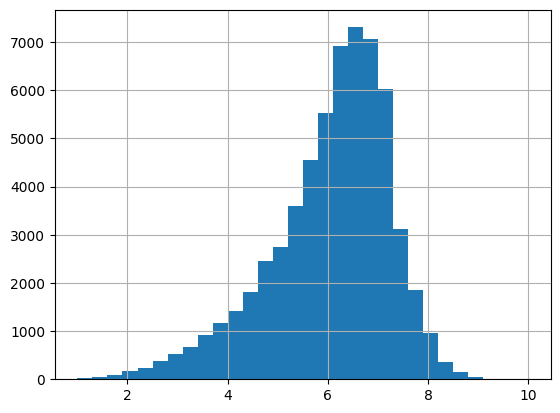

In [4]:
full_dataset.avg_vote.hist(bins=30);

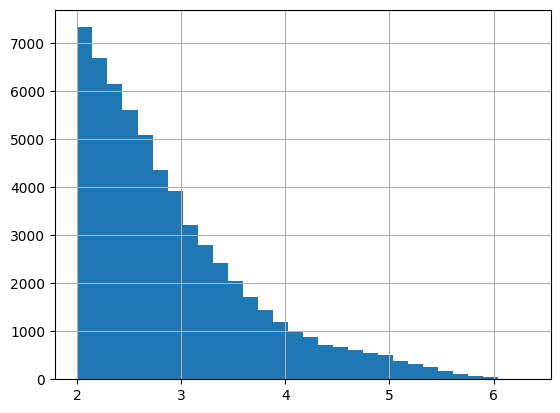

In [5]:
np.log10(full_dataset.votes).hist(bins=30);

This variables have Pearson correaltion coefficient of approximately 0.171, which suggests a modest positive correlation between the average vote and the number of votes a movie receives on IMDb. This indicates that, on average, movies with higher ratings tend to receive more votes, but the relationship is not very strong.

In [6]:
correlation = full_dataset.avg_vote.corr(full_dataset.votes)
print("Correlation between `avg_vote` and `votes`:", correlation)

Correlation between `avg_vote` and `votes`: 0.17095334602395723


Also  there are no missing values in these features:

In [7]:
print(f'Number of missing values for `avg_vote`: {full_dataset.avg_vote.isna().sum()}')
print(f'Number of missing values for `votes`: {full_dataset.votes.isna().sum()}')

Number of missing values for `avg_vote`: 0
Number of missing values for `votes`: 0


Now we need to highlight an important aspect of movie success prediction. `avg_vote` and `votes` represent different dimensions of a movie's success. While `avg_vote` reflects the quality or critical acclaim of a movie, `votes` represents its popularity or commercial success.

It's entirely reasonable to argue that `votes` is a more direct measure of commercial success because it quantifies the audience's engagement and reach. Movies with many votes tend to be seen by a larger audience, which can translate into higher revenue and commercial success, even if the average rating is not exceptionally high.

In contrast, `avg_vote` is more focused on the perceived quality of a movie and how well it's rated by viewers. A high `avg_vote` indicates that those who have seen the movie tend to rate it positively.

In the context of building a predictive model for movie success, we can consider using `votes` as our primary target variable, especially if our primary interest is to predict commercial success. To the contrary, `avg_vote` while still being an interesting  target, may have a less direct influence on a movie's commercial success.


Setting `votes` feature as the target varible means that movies with lower ratings but higher number of votes are more successful than top-rated movies with fewer votes. This also means that movies with totally different ratings but approximately equal votes are equal in their success.

1.2 Explain which task are you going to solve (is it a regression, classification or something else)? 

Based on the nature of the target variable (`votes`), we are going to solve a regression task, not a classification task. 

In a regression task, the goal is to predict a continuous numeric value, which is a suitable approxamation for variables like the number of votes. We are aiming to predict the count of votes a movie receives, and this count can take on a wide range of numeric values that can be closely approximated by a continuous variable, making it a regression problem.

In contrast, a classification task involves predicting a category or class label for each instance, which would be relevant if we were, for example, trying to categorize movies into groups (e.g., successful or not successful) based on specific criteria.

1.3 Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it. 

For the the purposes of the experiment mean absolute arror (MAE) was selected as a metric.

In [8]:
from sklearn.metrics import mean_absolute_error

### Part 2.

Explore and preprocess the data

2.1 Split data into train and test

In [9]:
from sklearn.model_selection import train_test_split

tr, te = train_test_split(full_dataset, test_size=0.2, random_state=42)

y_train, y_test = tr.votes, te.votes
X_train, X_test = tr.drop(['votes'], axis=1), te.drop(['votes'], axis=1)

2.2 Explore you data: make plots, print tables. Make sure to write your observations.  Do not forget to fill-in missing values, define relevant columns transformatios. 


In [10]:
# dataset description // numerical
full_dataset.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,60198.000000,60198.000000,60198.000000,6.019800e+04,8812.000000,56129.000000,51969.000000
mean,1985.308366,99.744825,5.997349,1.049150e+04,55.532229,44.926901,27.269872
std,23.308107,22.753228,1.199483,5.686771e+04,17.885123,152.973352,55.689940
min,1906.000000,40.000000,1.000000,1.000000e+02,1.000000,1.000000,1.000000
25%,1970.000000,88.000000,5.400000,2.060000e+02,43.000000,4.000000,3.000000
50%,1992.000000,95.000000,6.200000,5.030000e+02,56.000000,10.000000,8.000000
75%,2005.000000,107.000000,6.800000,2.000000e+03,68.000000,28.000000,24.000000
max,2019.000000,729.000000,10.000000,2.159628e+06,100.000000,7029.000000,837.000000


In [11]:
# dataset description // categorical
full_dataset.describe(include='object')

,imdb_title_id,title,original_title,date_published,genre,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income
count,60198,60198,60198,60198,60198,60193,59759,60174,59390,57454,60168,58205,16819,11892,19136
unique,60198,57284,57290,19431,1202,3318,3192,22771,47546,21441,60145,58126,3503,11529,18920
top,tt0000574,The Three Musketeers,The Three Musketeers,2010,Drama,USA,English,Michael Curtiz,Jing Wong,Metro-Goldwyn-Mayer (MGM),"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",Mail,$ 1000000,$ 1000000,$ 8144
freq,1,8,8,101,8498,22080,27008,86,70,1277,13,7,512,19,16


In [12]:
# general dataset info
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60198 entries, 0 to 60197
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          60198 non-null  object 
 1   title                  60198 non-null  object 
 2   original_title         60198 non-null  object 
 3   year                   60198 non-null  int64  
 4   date_published         60198 non-null  object 
 5   genre                  60198 non-null  object 
 6   duration               60198 non-null  int64  
 7   country                60193 non-null  object 
 8   language               59759 non-null  object 
 9   director               60174 non-null  object 
 10  writer                 59390 non-null  object 
 11  production_company     57454 non-null  object 
 12  actors                 60168 non-null  object 
 13  description            58205 non-null  object 
 14  avg_vote               60198 non-null  float64
 15  vo

In [13]:
# number of duplicates
full_dataset.duplicated().sum()

0

In [14]:
# proportion of missing values
full_dataset.isna().sum() / full_dataset.shape[0]

imdb_title_id            0.000000
title                    0.000000
original_title           0.000000
year                     0.000000
date_published           0.000000
genre                    0.000000
duration                 0.000000
country                  0.000083
language                 0.007293
director                 0.000399
writer                   0.013422
production_company       0.045583
actors                   0.000498
description              0.033107
avg_vote                 0.000000
votes                    0.000000
budget                   0.720605
usa_gross_income         0.802452
worlwide_gross_income    0.682116
metascore                0.853616
reviews_from_users       0.067594
reviews_from_critics     0.136699
dtype: float64

In [15]:
# proportion of unique values
full_dataset.nunique() / full_dataset.shape[0]

imdb_title_id            1.000000
title                    0.951593
original_title           0.951693
year                     0.001827
date_published           0.322785
genre                    0.019967
duration                 0.004269
country                  0.055118
language                 0.053025
director                 0.378268
writer                   0.789827
production_company       0.356175
actors                   0.999120
description              0.965580
avg_vote                 0.001478
votes                    0.210090
budget                   0.058191
usa_gross_income         0.191518
worlwide_gross_income    0.314296
metascore                0.001645
reviews_from_users       0.017310
reviews_from_critics     0.008788
dtype: float64

#### Features with large proportion of missing values

As it can be seen from above, there are several features with large proportions of missing values (over 60%). These are: `budget`, `usa_gross_income`, `worlwide_gross_income`, `metascore`. 

Such features as `usa_gross_income`, `worlwide_gross_income` cannot be used in our model as these are the actual target variables we are aming at indirectly through `votes` variable, so we shall not pass them to the model.

We also cannot use such important feature as `budget` because it is expressed in many currencies (68), therefore we introduce an indicator binary variable, `budget_known`, which informs the model whether the budget is known for a particular sample or not. 

`metascore` contains more than 85% of missing values and is highly correlated with `avg_vote` (0.721), therefore we remove this feature.

In [16]:
budget_df = full_dataset['budget'].dropna().str.split(expand=True)
budget_df.groupby(0)[1].count().sort_values(ascending=False)

0
$      12816
EUR     1216
CAD      511
GBP      470
INR      324
       ...  
NGN        1
PYG        1
BND        1
ILS        1
IEP        1
Name: 1, Length: 68, dtype: int64

In [17]:
correlation = full_dataset.avg_vote.corr(full_dataset.metascore)
print("Correlation between `avg_vote` and `metascore`:", correlation)

Correlation between `avg_vote` and `metascore`: 0.7211806378118387


We also can exclude such columns as `imdb_title_id`, `title`, `original_title`, `description` because they either have no influence on movie success or the influence can hardly be measured as they contain too many unique values (over 95%). We do not exclude the column `actors` though, in order to analize its contents later.

Finally, we can convert feature `year` to `age` to see if commercial success needs time. As to the `date_published` we can extract month from this feature to check if there is any annual seasonality. The initial columns `year` and `date_published` can also deleted after the conversion/extraction.

In [18]:
# replacing columns with missing values by binary indicators
def binary_indicator(X: pd.DataFrame, columns):
    for column in columns:
        X[f'{column}_known'] = X[column].notna().astype(int)
        X.drop(column, axis=1, inplace=True)
    return X

# converting static features to dynamic ones
def year_to_age(X: pd.DataFrame, columns):
    for column in columns:
        X[f'{column}_age'] = X[column].max() - X[column]
        X.drop(column, axis=1, inplace=True)
    return X

# converting dates to months
def date_to_month(X: pd.DataFrame, columns):
    for column in columns:
        X[f'{column}_month'] = pd.to_datetime(X[column], errors='coerce').dt.month.fillna(0).astype(int)
        X.drop(column, axis=1, inplace=True)
    return X

# removing features not passed to the model
def reduction(X: pd.DataFrame, columns):
    X.drop(columns, axis=1, inplace=True)
    return X


In [19]:
reduced_dataset = full_dataset.copy()

to_binary = ['budget']
to_age = ['year']
to_month = ['date_published']
to_exclude = ['imdb_title_id', 'title', 'original_title', 'description', 'usa_gross_income', 'worlwide_gross_income', 'metascore']

binary_indicator(reduced_dataset, to_binary)
year_to_age(reduced_dataset, to_age)
date_to_month(reduced_dataset, to_month)
reduction(reduced_dataset, to_exclude)

reduced_dataset.head()

,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,reviews_from_users,reviews_from_critics,budget_known,year_age,date_published_month
0,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,537,7.0,7.0,1,113,12
1,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.9,171,4.0,2.0,0,108,8
2,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,420,24.0,3.0,1,107,11
3,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2019,28.0,14.0,0,108,3
4,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.7,438,12.0,5.0,0,107,1


In [20]:
# separating number and object columns
def column_separation(dataset, target):
    number_columns = dataset.select_dtypes(exclude='object').columns.to_list()
    object_columns = dataset.select_dtypes(include='object').columns.to_list()
    number_columns.remove(target)
    return number_columns, object_columns

In [21]:
number_columns, object_columns = column_separation(reduced_dataset, 'votes')
print(number_columns, object_columns, sep='\n')

['duration', 'avg_vote', 'reviews_from_users', 'reviews_from_critics', 'budget_known', 'year_age', 'date_published_month']
['genre', 'country', 'language', 'director', 'writer', 'production_company', 'actors']


#### Analisys for number columns: Distribution, outliers and correlation

* Correlation

In [22]:
def correlation_heatmap(dataset, columns):
    correlation_matrix = dataset[columns].corr()
    plt.figure(figsize=(15, 10)) 
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', aspect='auto')
    plt.colorbar()
    plt.title('correlation matrix heatmap')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

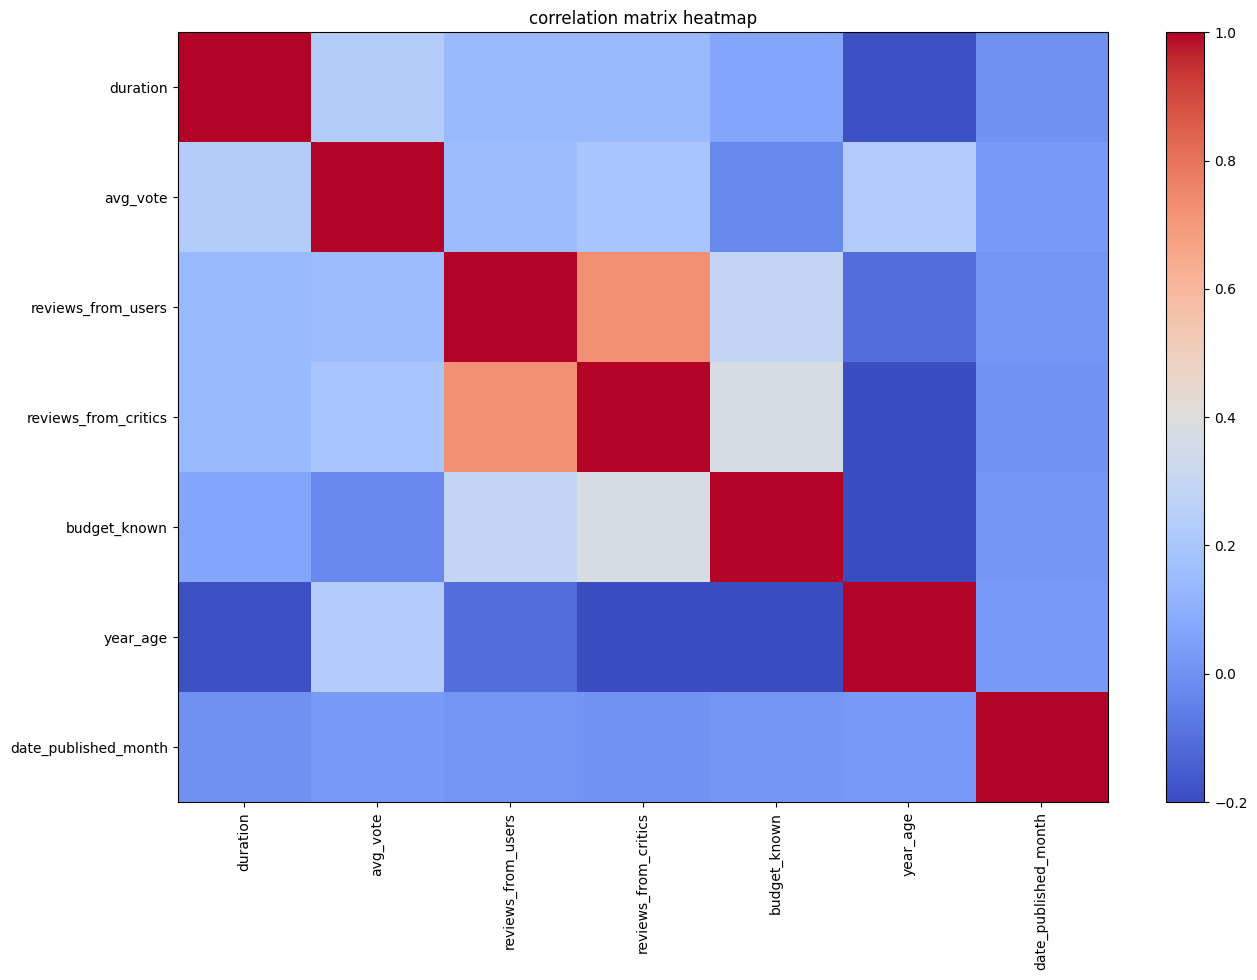

In [23]:
correlation_heatmap(reduced_dataset, number_columns)

There is a high positive correlation between `reviews_from_users`, `reviews_from_critics` (0.725). Let us replace these two features by one equalling to sum of them.

In [24]:
correlation = reduced_dataset.reviews_from_users.corr(reduced_dataset.reviews_from_critics)
print("Correlation between `reviews_from_users` and `reviews_from_critics`:", correlation)

Correlation between `reviews_from_users` and `reviews_from_critics`: 0.7251574865350178


In [25]:
def review_summation(X: pd.DataFrame, columns):
    X['reviews'] = X[columns].sum(axis=1)
    X.drop(columns, axis=1, inplace=True)
    return X

review_columns = ['reviews_from_users', 'reviews_from_critics']
review_summation(reduced_dataset, review_columns)
reduced_dataset.head()

,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget_known,year_age,date_published_month,reviews
0,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,537,1,113,12,14.0
1,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.9,171,0,108,8,6.0
2,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,420,1,107,11,27.0
3,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2019,0,108,3,42.0
4,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.7,438,0,107,1,17.0


In [26]:
number_columns, object_columns = column_separation(reduced_dataset, 'votes')

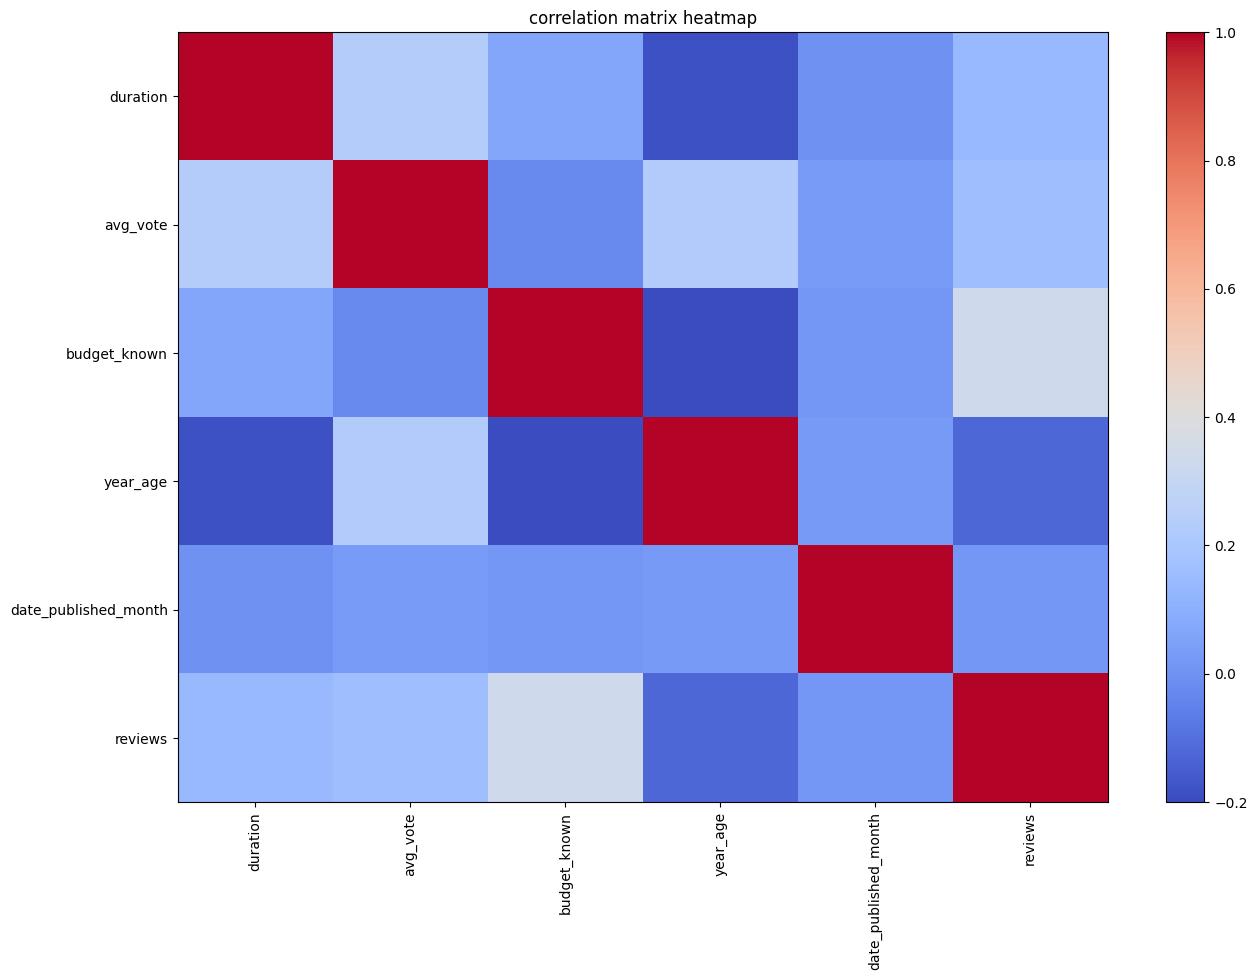

In [27]:
correlation_heatmap(reduced_dataset, number_columns)

* Distribution

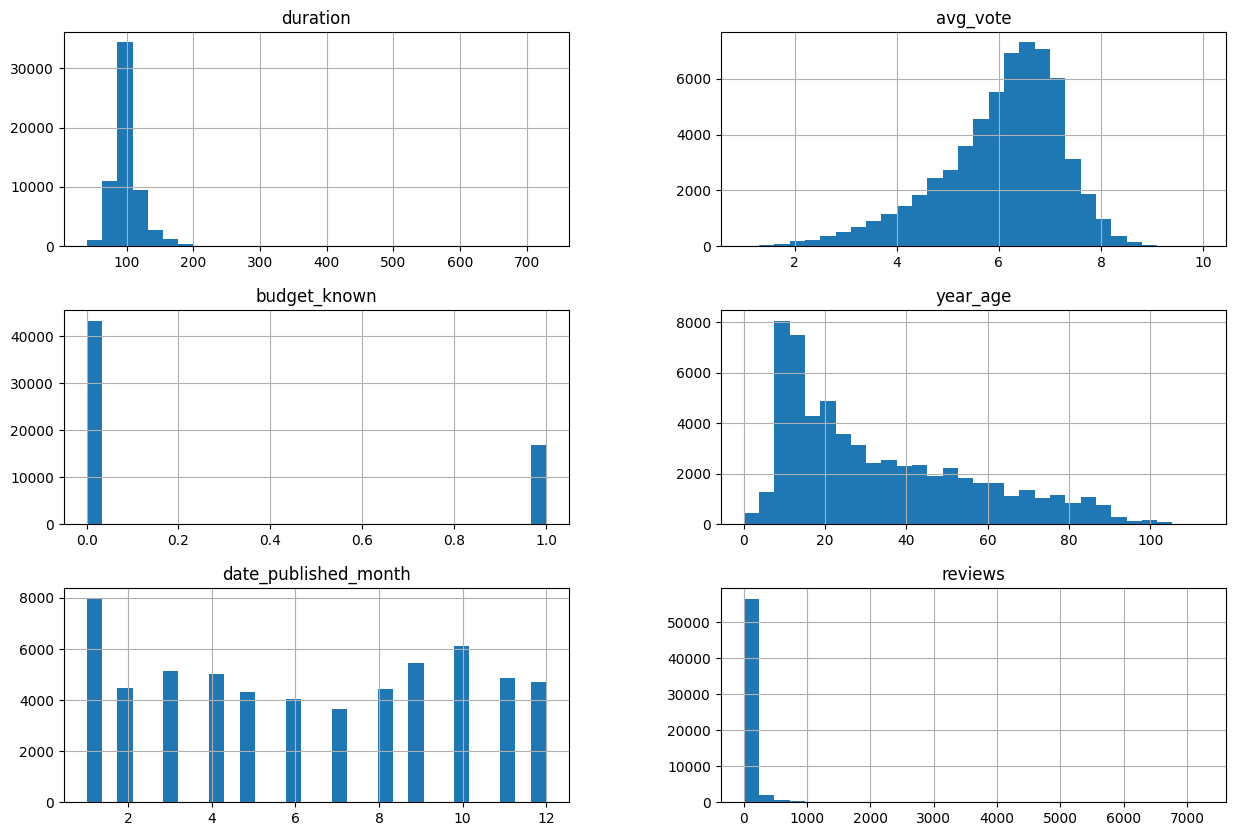

In [28]:
reduced_dataset.hist(column=number_columns, figsize = (15, 10), bins=30);

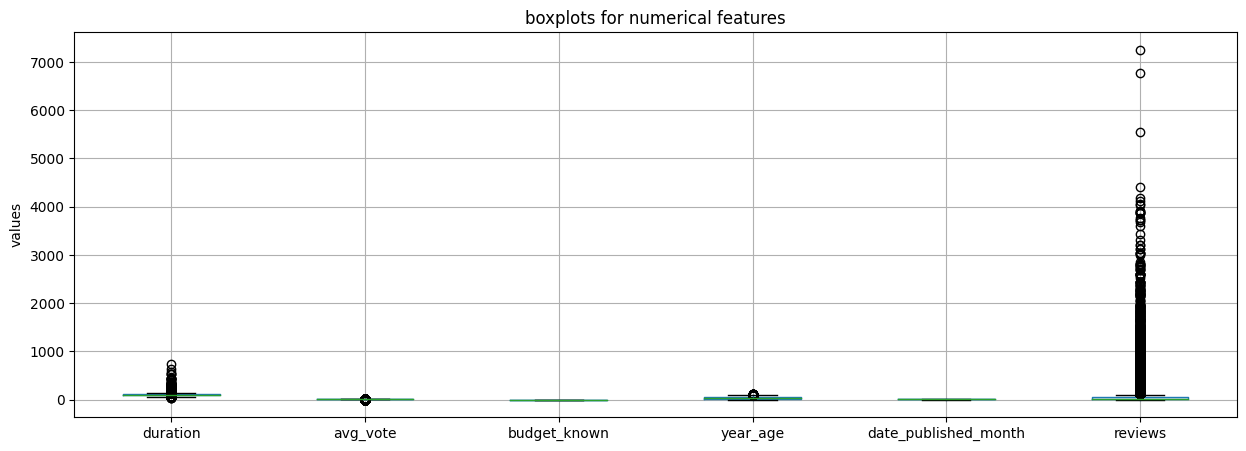

In [29]:
reduced_dataset[number_columns].boxplot(figsize = (15, 5), ylabel='values')
plt.title('boxplots for numerical features');

We also can see outliers for `duration` and `reviews`, density of these features is shifted to the left. Removing outliers may help fixing this.

In [30]:
def remove_outliers(X: pd.DataFrame, columns, side='both', return_removed_indices=False):
    q1 = X[columns].quantile(0.25)
    q3 = X[columns].quantile(0.75)
    iqr = q3 - q1

    if side == 'both':
        outliers = ((X[columns] < (q1 - 1.5 * iqr)) | (X[columns] > (q3 + 1.5 * iqr)))
    elif side == 'left':
        outliers = (X[columns] < (q1 - 1.5 * iqr))
    elif side == 'right':
        outliers = (X[columns] > (q3 + 1.5 * iqr))
    else:
        print('Wrong values for `side` parameter. Expected `right`, `left` or `both`.')
        return
    
    outliers_indices = outliers.any(axis=1)
    filtered_data = X[~outliers_indices]
    removed_indices = X[outliers_indices].index
    
    if return_removed_indices:
        return filtered_data, removed_indices
    else: 
        return filtered_data


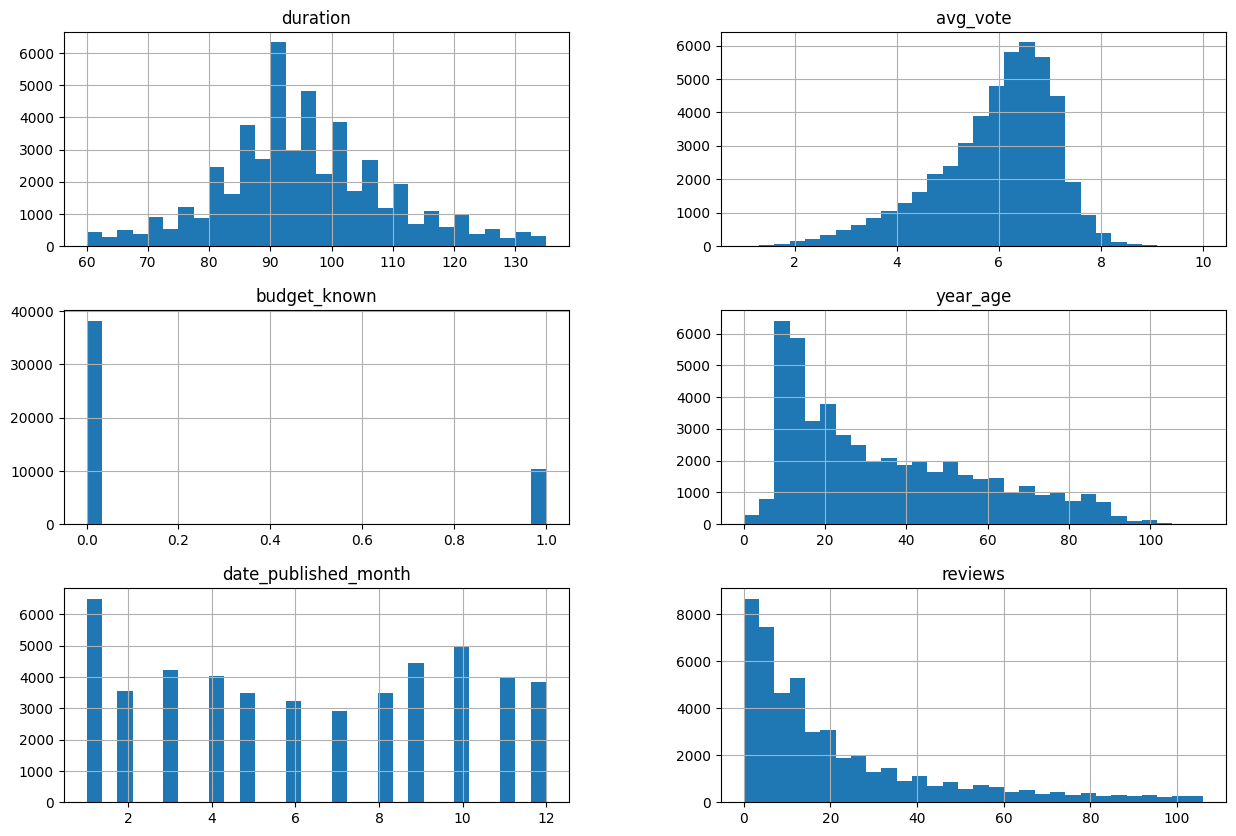

In [31]:
outlier_columns = ['duration', 'reviews']
remove_outliers(reduced_dataset, outlier_columns).hist(column=number_columns, figsize = (15, 10), bins=30);

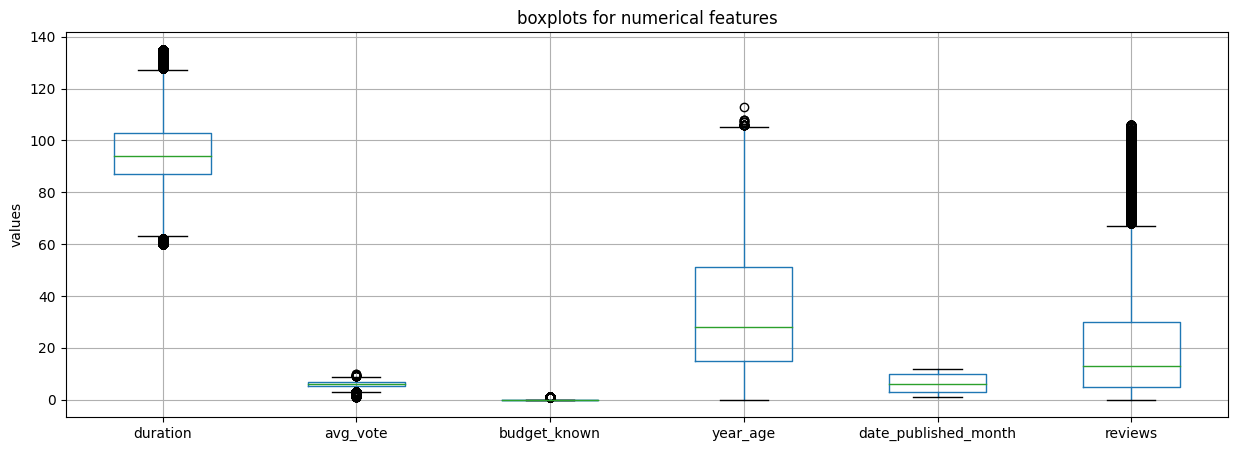

In [32]:
remove_outliers(reduced_dataset, outlier_columns).boxplot(column=number_columns, figsize = (15, 5), ylabel='values')
plt.title('boxplots for numerical features');

Outlier removal allows to achieve less skewed distributions.

In [33]:
full_dataset.shape, reduced_dataset.shape, remove_outliers(reduced_dataset, outlier_columns).shape

((60198, 22), (60198, 14), (48689, 14))

#### Analisys for object columns

In [34]:
print(object_columns)

['genre', 'country', 'language', 'director', 'writer', 'production_company', 'actors']


Number of unique names for `genre`: 24


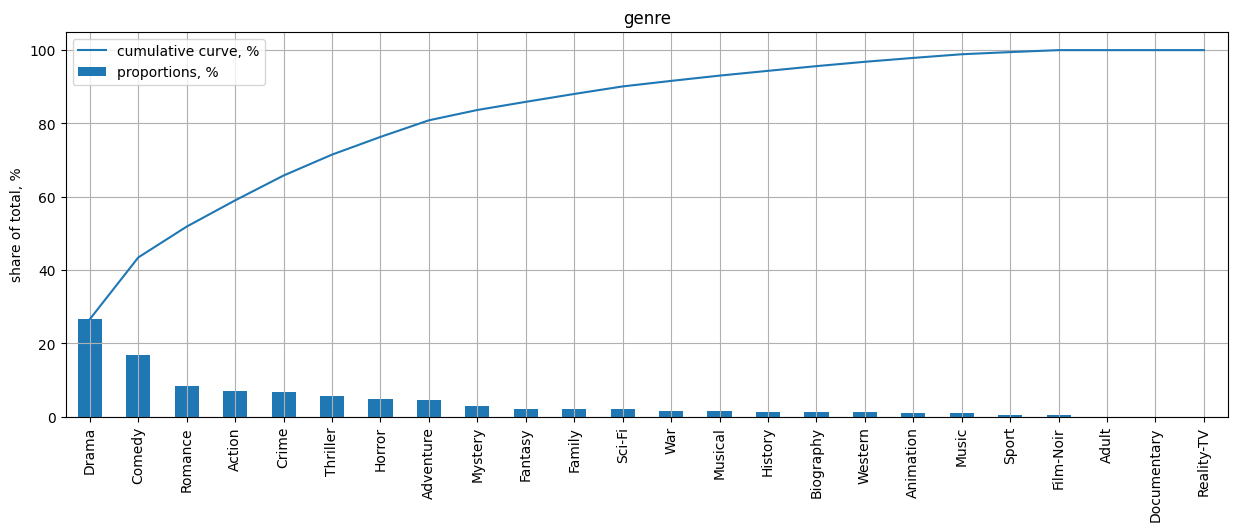

Number of unique names for `country`: 170


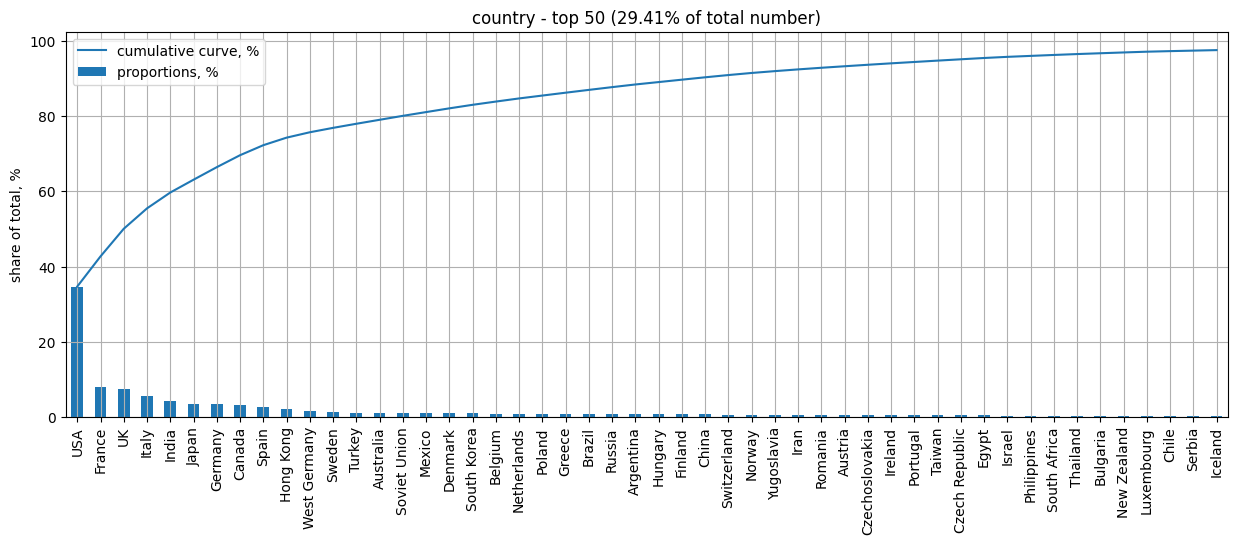

Number of unique names for `language`: 239


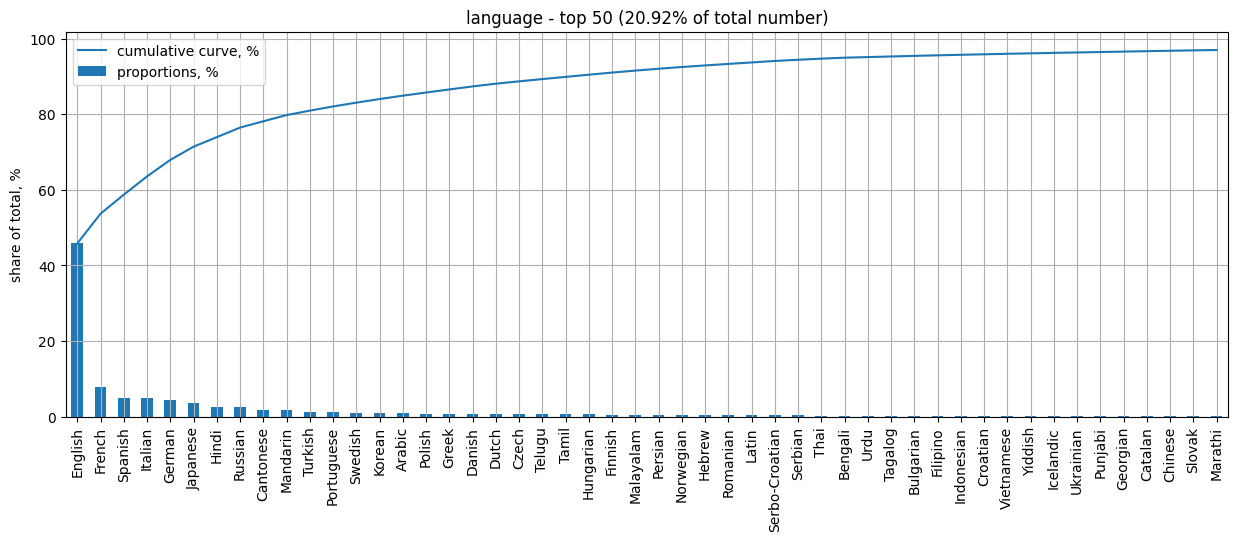

Number of unique names for `director`: 22540


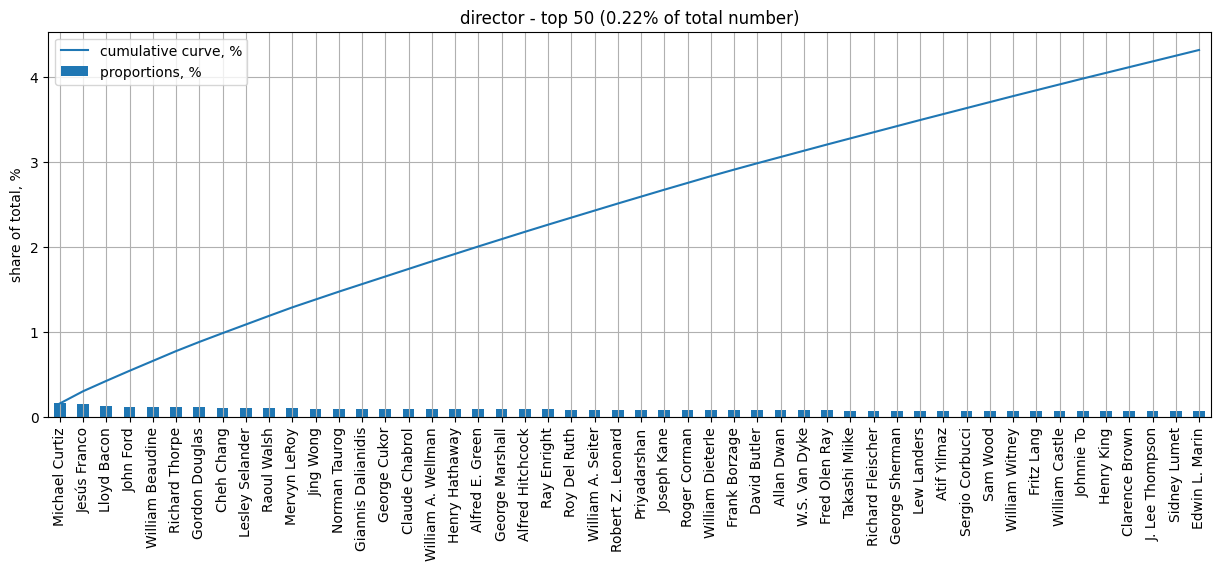

Number of unique names for `writer`: 42982


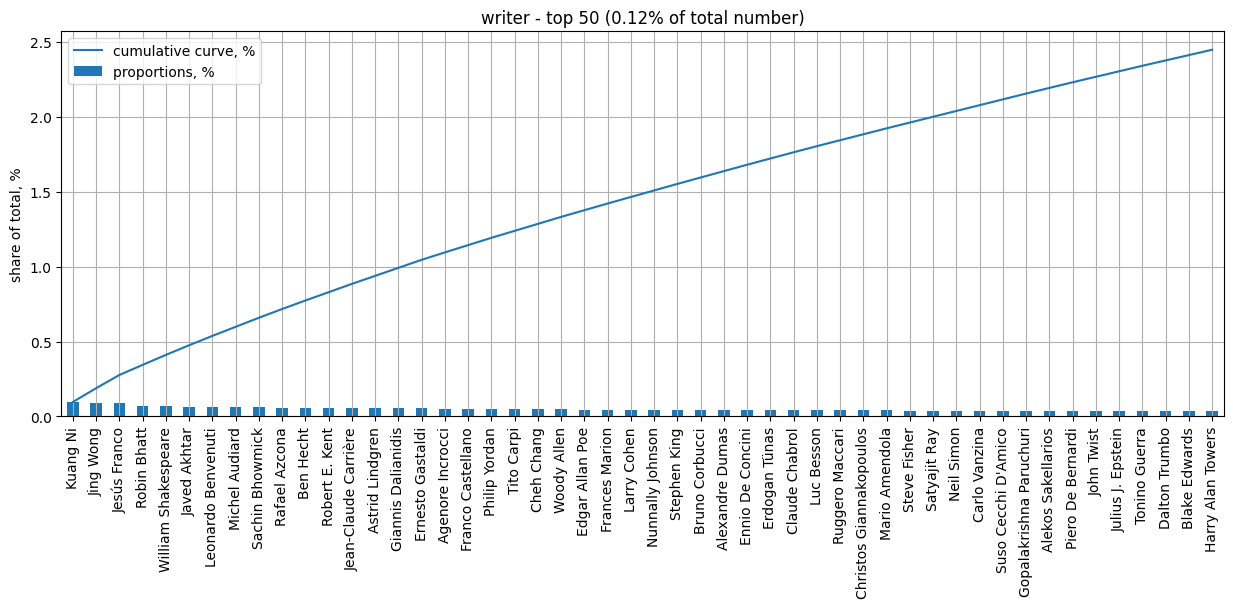

Number of unique names for `production_company`: 21490


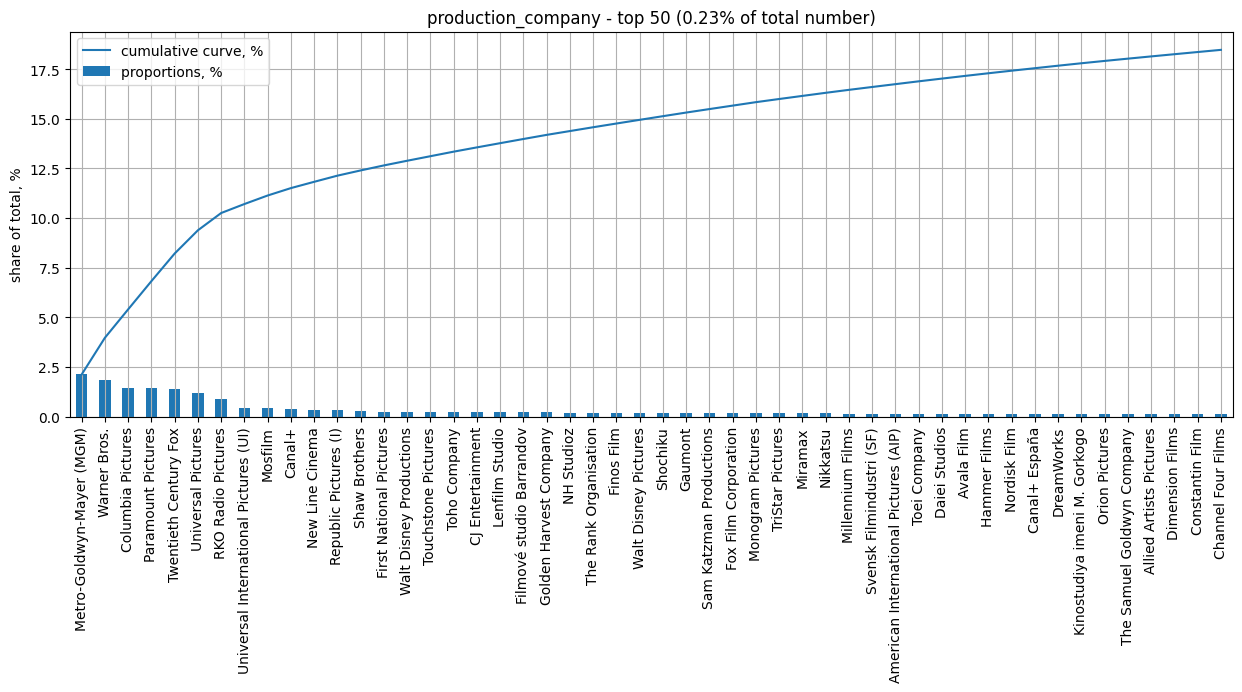

Number of unique names for `actors`: 294922


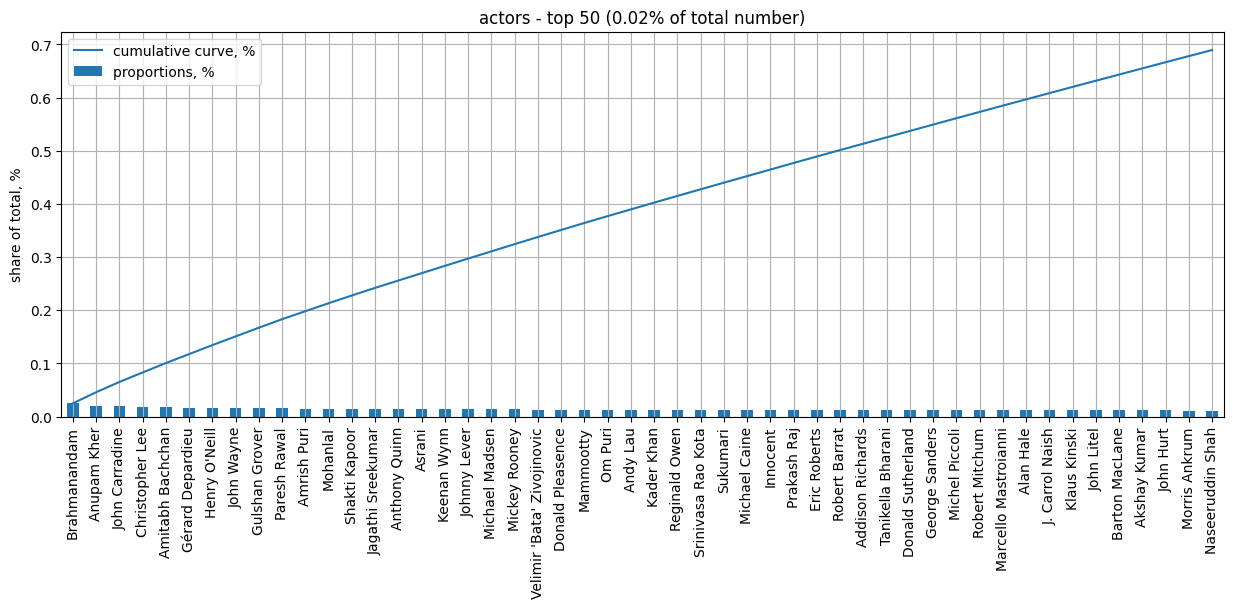

In [35]:
top_selection = 50
dataset = reduced_dataset

for column in object_columns:
    name_series = dataset[column].str.split(', ').explode()
    unique_names_count = len(set(name_series))
    print(f"Number of unique names for `{column}`: {unique_names_count}")

    (name_series.value_counts() / name_series.shape[0] * 100)[:top_selection].cumsum().plot(grid=True, figsize=(15,5), label='cumulative curve, %')
    (name_series.value_counts() / name_series.shape[0] * 100)[:top_selection].plot(kind='bar', grid=True, figsize=(15,5), label='proportions, %', ylabel='share of total, %')
    title_string = " - top " + str(top_selection) + " (" + str(round(top_selection / unique_names_count * 100, 2)) + "% of total number)" if unique_names_count >= top_selection else ""
    plt.title(f'{column}{title_string}')
    plt.legend()
    plt.show()

In [36]:
print(object_columns)

['genre', 'country', 'language', 'director', 'writer', 'production_company', 'actors']


The plots above are illutsrtaing proportions of different categorical features and running sums of them.

Let us apply the following approach:
* `genre`, `country`, `language` - One Hot Encoding for 5 most frequent values,
* `production_company` - Ordinal Encoding for the following groups of most frequent values: (top 10) = 1, (10 to 20) = 2, (20 to 30) = 3, (30 to 40) = 4, (over 40) = 5, (NaN) = 0.
* `director`, `writer`, `actors` - binary varible taking 1 for 50 most frequent values and 0 for the rest.

For such purposes we shall implement helper functions.

In [37]:
def encode_top_names(X: pd.DataFrame, columns, top_count, delimiter=', '):
    # processed_dataset = dataset.copy()

    for column in columns:
        name_split = X[column].str.split(delimiter)
        name_flattened = name_split.explode()
        name_frequencies = name_flattened.value_counts()
        top_names = name_frequencies.head(top_count).index
        for name in top_names:
            X[f'{column}_{name}'] = name_split.apply(lambda x: int(name in x) if np.any(pd.notna(x)) else 0)
        X.drop(column, axis=1, inplace=True)

    return X

In [38]:
# testing one hot encoding of most frequent names

dataset = reduced_dataset.copy()
target_columns = ['genre', 'country', 'language']
top_count = 5

encode_top_names(dataset, target_columns, top_count).head()

,duration,director,writer,production_company,actors,avg_vote,votes,budget_known,year_age,date_published_month,...,country_USA,country_France,country_UK,country_Italy,country_India,language_English,language_French,language_Spanish,language_Italian,language_German
0,70,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,537,1,113,12,...,0,0,0,0,0,0,0,0,0,0
1,53,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.9,171,0,108,8,...,0,0,0,0,0,0,0,0,0,0
2,100,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,420,1,107,11,...,1,0,0,0,0,1,0,0,0,0
3,68,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2019,0,108,3,...,0,0,0,1,0,0,0,0,1,0
4,60,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.7,438,0,107,1,...,1,0,0,0,0,1,0,0,0,0


In [39]:
def encode_top_groups(X: pd.DataFrame, columns):

    for column in columns:
        name_frequencies = X[column].value_counts()
        name_ranking = name_frequencies.index

        group_mapping = {}
        group_names = [1, 2, 3, 4, 5]
        group_boundaries = [0, 10, 20, 30, 40, len(name_ranking)]
        
        for i, group_name in enumerate(group_names):
            start, end = group_boundaries[i], group_boundaries[i+1]
            group_mapping.update({name: group_name for name in name_ranking[start:end]})

        X[f'{column}_group'] = X[column].map(group_mapping).fillna(0).astype(int)

        X.drop(column, axis=1, inplace=True)

    return X

In [40]:
# testing one hot encoding of most frequent groups

dataset = reduced_dataset.copy()
target_columns = ['production_company']

encode_top_groups(dataset, target_columns).head()

,genre,duration,country,language,director,writer,actors,avg_vote,votes,budget_known,year_age,date_published_month,reviews,production_company_group
0,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,537,1,113,12,14.0,5
1,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini","Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.9,171,0,108,8,6.0,5
2,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,420,1,107,11,27.0,5
3,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2019,0,108,3,42.0,5
4,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.7,438,0,107,1,17.0,5


In [41]:
def binary_top_names(X: pd.DataFrame, columns, top_count, delimiter=', '):
    # processed_dataset = dataset.copy()

    for column in columns:
        name_split = X[column].str.split(delimiter)
        name_flattened = name_split.explode()
        name_frequencies = name_flattened.value_counts()
        top_names = name_frequencies.head(top_count).index
        X[f'{column}_top{top_count}'] = name_split.apply(lambda x: int(any(name in top_names for name in x)) if np.any(pd.notna(x)) else 0)
        X.drop(column, axis=1, inplace=True)

    return X

In [42]:
# testing binary feature encoding for most frequent names

dataset = reduced_dataset.copy()
target_columns = ['director', 'writer', 'actors']
top_count = 50

results = binary_top_names(dataset, target_columns, top_count)

for column in target_columns:
    column_name = f'{column}_top{top_count}'
    display(results[column_name].value_counts())

0    57463
1     2735
Name: director_top50, dtype: int64

0    58090
1     2108
Name: writer_top50, dtype: int64

0    55779
1     4419
Name: actors_top50, dtype: int64

In [43]:
reduced_dataset.isna().sum() / reduced_dataset.shape[0]

genre                   0.000000
duration                0.000000
country                 0.000083
language                0.007293
director                0.000399
writer                  0.013422
production_company      0.045583
actors                  0.000498
avg_vote                0.000000
votes                   0.000000
budget_known            0.000000
year_age                0.000000
date_published_month    0.000000
reviews                 0.000000
dtype: float64

In [44]:
number_columns, object_columns = column_separation(full_dataset, target='votes')
print(number_columns, object_columns, sep='\n')

['year', 'duration', 'avg_vote', 'metascore', 'reviews_from_users', 'reviews_from_critics']
['imdb_title_id', 'title', 'original_title', 'date_published', 'genre', 'country', 'language', 'director', 'writer', 'production_company', 'actors', 'description', 'budget', 'usa_gross_income', 'worlwide_gross_income']


In [45]:
X_train.shape, X_test.shape

((48158, 21), (12040, 21))

Now let us perfom dataset preprocessing and prepare a column transformer.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

columns_to_binary = ['budget']
columns_to_age = ['year']
columns_to_month = ['date_published']
columns_review = ['reviews_from_users', 'reviews_from_critics']
columns_to_exclude = ['imdb_title_id', 'title', 'original_title', 'description', 'usa_gross_income', 'worlwide_gross_income', 'metascore']
columns_top_names = ['genre', 'country', 'language']
columns_top_groups = ['production_company']
columns_top_names_binary = ['director', 'writer', 'actors']
columns_with_outliers = ['duration', 'reviews']
columns_to_scale = ['duration', 'avg_vote', 'year_age', 'date_published_month', 'reviews']

top_names_count = 5
top_names_binary_count = 50

In [47]:
X_X = [X_train, X_test]

for X in X_X:
    binary_indicator(X, columns_to_binary)
    year_to_age(X, columns_to_age)
    date_to_month(X, columns_to_month)
    review_summation(X, columns_review)
    reduction(X, columns_to_exclude)
    encode_top_names(X, columns_top_names, top_names_count)
    encode_top_groups(X, columns_top_groups)
    binary_top_names(X, columns_top_names_binary, top_names_binary_count)

# removing outliers
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train_final, removed_indices = remove_outliers(X_train, columns_with_outliers, return_removed_indices=True)
y_train_final = y_train.drop(removed_indices)
X_test_final, removed_indices = remove_outliers(X_test, columns_with_outliers, return_removed_indices=True)
y_test_final = y_test.drop(removed_indices)
print(X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape)

>>>
(48158, 25), (48158,), (12040, 25), (12040,)
>>>
(38937, 25), (38937,), (9752, 25), (9752,)


In [48]:
column_transformer = ColumnTransformer([    
    ('scaler', StandardScaler(), columns_to_scale)
], remainder='passthrough')

### Part 3.

Train and compare the models

3.1. Select models, you are going to train, select hyperparameters that have to be tuned.

In [49]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('preprocess', column_transformer),
    ('reg', Lasso())
])


param_grid_lasso = {
    'reg': [Lasso()],
    'reg__alpha': [0.1, 1, 5, 10, 50],
}

param_frid_gradient = {
    'reg': [GradientBoostingRegressor()],
    'reg__learning_rate': [0.1, 0.2],
    'reg__n_estimators': [150, 200],
    'reg__max_depth': [6, 9],
    'reg__min_samples_split': [6, 10],
    # 'reg__min_samples_leaf': min_samples_leaf,
    # 'reg__subsample': [0.5, 1.0],
}

param_grid_forest = {
    'reg': [RandomForestRegressor()],
    'reg__n_estimators': [150, 200],
    'reg__max_depth': [15, 20],
    'reg__min_samples_split': [3, 6, 10],
    # 'reg__min_samples_leaf': min_samples_leaf,
}

param_grid = [param_grid_lasso, param_frid_gradient, param_grid_forest]


3.2 Use cross-validation to compare models and select best set of hyperparameters

In [50]:
from sklearn.model_selection import GridSearchCV

grid_pipe = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=3)
grid_pipe.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 33 candidates, totalling 165 fits
[CV 1/5] END ....reg=Lasso(), reg__alpha=0.1;, score=-868.368 total time=   0.1s
[CV 2/5] END ....reg=Lasso(), reg__alpha=0.1;, score=-850.700 total time=   0.1s
[CV 3/5] END ....reg=Lasso(), reg__alpha=0.1;, score=-872.214 total time=   0.1s
[CV 4/5] END ....reg=Lasso(), reg__alpha=0.1;, score=-838.295 total time=   0.1s
[CV 5/5] END ....reg=Lasso(), reg__alpha=0.1;, score=-862.249 total time=   0.1s
[CV 1/5] END ......reg=Lasso(), reg__alpha=1;, score=-865.930 total time=   0.1s
[CV 2/5] END ......reg=Lasso(), reg__alpha=1;, score=-848.546 total time=   0.1s
[CV 3/5] END ......reg=Lasso(), reg__alpha=1;, score=-870.027 total time=   0.1s
[CV 4/5] END ......reg=Lasso(), reg__alpha=1;, score=-836.143 total time=   0.1s
[CV 5/5] END ......reg=Lasso(), reg__alpha=1;, score=-860.188 total time=   0.1s
[CV 1/5] END ......reg=Lasso(), reg__alpha=5;, score=-858.890 total time=   0.0s
[CV 2/5] END ......reg=Lasso(), reg__alpha=5;, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'avg_vote',
                                                                          'year_age',
                                                                          'date_published_month',
                                                                          'reviews'])])),
                                       ('reg', Lasso())]),
             param_grid=[{'reg': [Lasso()], 'reg__alpha': [0.1, 1, 5, 10, 50]},
                         {'reg': [GradientBoostingRegressor(max_depth=6,
                                                            min_samples_split=6,
                                                            n_estimators=150)],
                          'reg__learning_rate': [0.1, 0.2],
                          'reg__max_depth': [6, 9],
                          'reg__min_samples_split': [6, 10],
                          'reg__n_estimators': [150, 200]},
                         {'reg': [RandomForestRegressor()],
                          'reg__max_depth': [15, 20],
                          'reg__min_samples_split': [3, 6, 10],
                          'reg__n_estimators': [150, 200]}],
             scoring='neg_mean_absolute_error', verbose=3)

3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?

In [51]:
print(grid_pipe.best_score_)
print(grid_pipe.best_params_)
print(grid_pipe.best_estimator_.steps[1][1])

-602.0461584569586
{'reg': GradientBoostingRegressor(max_depth=6, min_samples_split=6, n_estimators=150), 'reg__learning_rate': 0.1, 'reg__max_depth': 6, 'reg__min_samples_split': 6, 'reg__n_estimators': 150}
GradientBoostingRegressor(max_depth=6, min_samples_split=6, n_estimators=150)


In [61]:
grid_pipe.best_estimator_.fit(X_train_final, y_train_final)
y_pred = grid_pipe.best_estimator_.predict(X_test_final)
print(f'MAE: {mean_absolute_error(y_test_final, y_pred):.0f}')

MAE: 583


The best results has shown Gradient Boosting Regressor with following parameters: <br>
learning_rate: 0.1, max_depth: 6, min_samples_split: 6, n_estimators: 150.

Predictions on the test dataset have shown mean absolute arror (MAE) at 583.

> Model presentation

Facing lack of data for such commercial figures as `usa_gross_income` and `worlwide_gross_income` in the initial IMDb dataset, we have designed the model to predict target variable `votes`. 

We assumed that this variable can be considered as a proxy for actual variables of interest because it reflects the number of impressed viewers, encompassing both pisitive and negative impression.

The model does not predict the `avg_vote` as we were primarily aiming to give some idea of potenial commercial success of a movie whereas `avg_vote` is very moderately correlated with `votes`. While it's true that, on average, movies with higher ratings tend to receive more votes, this relationship is not very strong, as evident from the scatterplot below.

This model is tailored and well-suited for commercial movies intended for wide public rather than independent films (auteur cinema) or art house for a limited audience. 

While the values of mean absolute error at 583 is relatively acceptable for mass audience moives we can further optimize this model for specific needs by expanding the dataset or adding external data sources, which could improve model performance. This can help capture trends, cultural references, or external events that might influence a movie's success. We also might explore new ways to capture the impact of movie trailers, marketing campaigns, or star power.

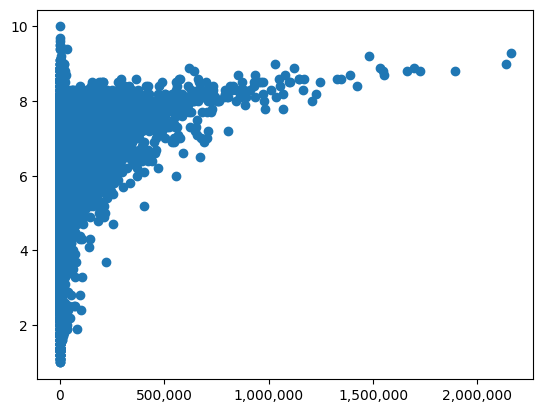

In [62]:
x_label = 0.5 * 1e6 * np.array(range(5))
formatted_labels = [f"{int(label):,}" for label in x_label]
plt.scatter(full_dataset.votes, full_dataset.avg_vote)
plt.xticks(x_label, formatted_labels);